# House Prices Competition : Term Project 

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import lightgbm as lgb


In [3]:
# getting data from feature engineering notebook
%store -r train_set_1
%store -r test_set_1
%store -r ytrain_1

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")


train_set = train_set_1
test_set = test_set_1

In [4]:
train_set.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,6.752270,6.749931,0.0,0,1.098612,6.559615,0.0,0.0,0.0,5.010635,...,0,0,0,0,0,0,0,1,0,1
1,7.140453,0.000000,0.0,0,1.098612,6.885510,0.0,0.0,0.0,5.648974,...,0,0,0,0,0,0,0,1,0,1
2,6.824374,6.763885,0.0,0,1.098612,6.186209,0.0,0.0,0.0,6.073045,...,0,0,0,0,0,0,0,1,0,1
3,6.867974,6.628041,0.0,0,1.098612,5.375278,0.0,0.0,0.0,6.291569,...,0,0,0,0,0,0,0,1,0,1
4,7.043160,6.959399,0.0,0,1.386294,6.484635,0.0,0.0,0.0,6.194405,...,0,0,0,0,0,0,0,1,0,1


In [5]:
print ("Train data shape:", train_set.shape)

Train data shape: (1452, 291)


In [6]:
test_set.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
1452,6.797940,0.000000,0.0,0,0.693147,6.148468,4.969813,0.0,0.0,5.598422,...,0,0,0,0,0,0,0,1,0,1
1453,7.192182,0.000000,0.0,0,1.098612,6.827629,0.000000,0.0,0.0,6.006353,...,0,0,0,0,0,0,0,1,0,1
1454,6.833032,6.552508,0.0,0,1.098612,6.673298,0.000000,0.0,0.0,4.919981,...,0,0,0,0,0,0,0,1,0,1
1455,6.830874,6.519147,0.0,0,1.098612,6.400257,0.000000,0.0,0.0,5.780744,...,0,0,0,0,0,0,0,1,0,1
1456,7.154615,0.000000,0.0,0,0.693147,5.572154,0.000000,0.0,0.0,6.924612,...,0,0,0,0,0,0,0,1,0,1


In [7]:
print ("Test data shape:", test_set.shape)


Test data shape: (1459, 291)


## Building the model:

In [8]:
# we keep the test id to make submission after
test_ID = test["Id"]

In [9]:
# we apply log to the target value
X = train_set
y = np.log(ytrain_1)
y

array([ 12.24769432,  12.10901093,  12.31716669, ...,  12.49312952,
        11.86446223,  11.90158345])

### PCA:

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)                
t_train = scaler.transform(X)
pca_hp = PCA(30)
x_fit = pca_hp.fit_transform(t_train)
np.exp(pca_hp.explained_variance_ratio_)

array([ 1.07256389,  1.03336776,  1.02966173,  1.02418464,  1.02263194,
        1.01743549,  1.0162857 ,  1.01562277,  1.01250053,  1.01199764,
        1.01173288,  1.0110748 ,  1.01062701,  1.01040407,  1.01001987,
        1.00967893,  1.00952164,  1.00918938,  1.0088583 ,  1.00856937,
        1.00854851,  1.00832656,  1.00808157,  1.00802194,  1.00774902,
        1.007698  ,  1.00751457,  1.00730231,  1.00722188,  1.00700724])

### Train Test split:

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#with pca
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_fit, y, test_size=0.33, random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.cross_validation import KFold, cross_val_score, cross_val_predict
k_fold = KFold(len(y), n_folds=10, shuffle=True, random_state=0)

### Random Forest:

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest on Training Set
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
model_random_forest = regressor.fit(X_train, y_train)


# Score model
cross_valid_scores = cross_val_score(model_random_forest, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", model_random_forest.score(X_test, y_test)) 

print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(model_random_forest, X_test, y_test, cv=5 )

Test score is: 
 0.8754758075
Cross validation test scores are: 
 [ 0.84899148  0.87587195  0.82510258  0.88049997  0.74345674]
Cross validation test scores mean is: 
 0.834784544912


In [13]:
predictions_1 = model_random_forest.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_1)))

Mean squared Error : 0.0192430913368


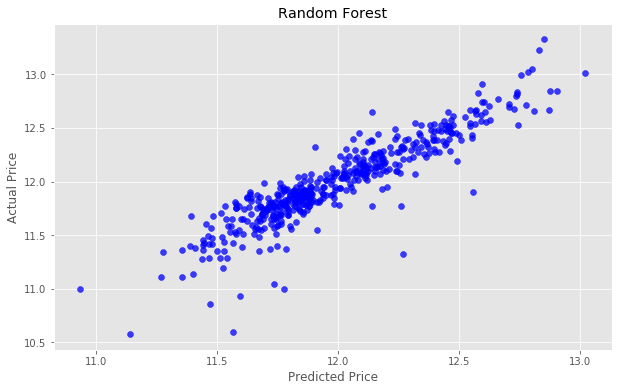

In [14]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest')
plt.show()

### KNN:

In [15]:
k=5
knn = neighbors.KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=k, p=2,
          weights='uniform')

knn.fit(X_train, y_train)

cross_valid_scores = cross_val_score(knn, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", knn.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
predict = cross_val_predict(knn, X_test, y_test, cv=5 )

Test score is: 
 0.715497005517
Cross validation test scores are: 
 [ 0.67494026  0.76897377  0.70339879  0.67084375  0.60238022]


In [16]:
predictions_2 = knn.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_2)))

Mean squared Error : 0.043965088217


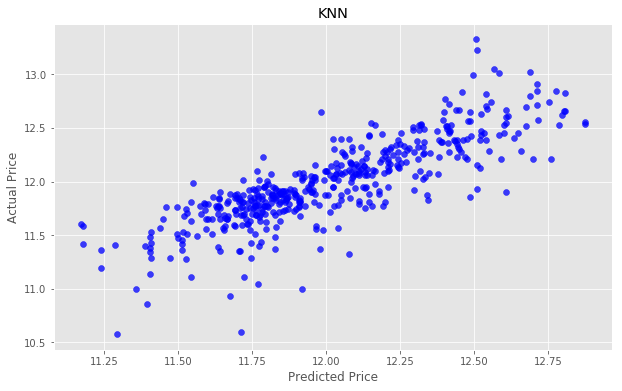

In [17]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('KNN')
plt.show()

### Linear Regression:

In [18]:
# Linear Regression
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

# Score model
cross_valid_scores = cross_val_score(regressor, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", regressor.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(regressor, X_test, y_test, cv=5 )

Test score is: 
 0.885697265407
Cross validation test scores are: 
 [  7.97529319e-01   8.29158601e-01  -4.19454935e+01  -1.42448350e+02
  -1.71619920e+03]
Cross validation test scores mean is: 
 -379.793270517


In [19]:
predictions_3 = regressor.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_3)))

Mean squared Error : 0.0176635392501


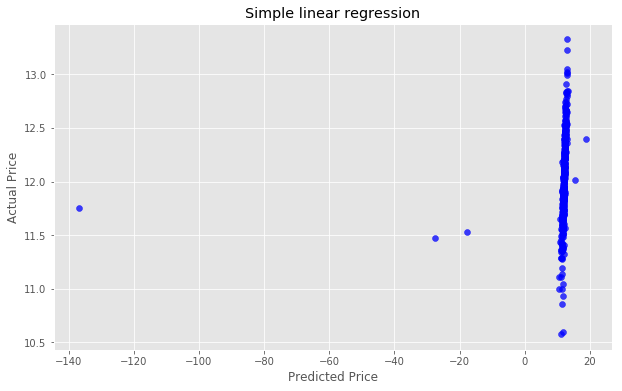

In [20]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Simple linear regression')
plt.show()

### Linear Regression with ridge regularization:

In [21]:
from sklearn.metrics import mean_squared_error

linm = linear_model.Ridge(alpha = 10)

linm.fit(X_train, y_train)

# Score model
cross_valid_scores = cross_val_score(linm, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", linm.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(linm, X_test, y_test, cv=5 )

Test score is: 
 0.902661626488
Cross validation test scores are: 
 [ 0.89017587  0.89994917  0.87510542  0.92186206  0.82871156]
Cross validation test scores mean is: 
 0.883160817513


In [22]:
predictions = linm.predict(X_test)
print("Mean Squared Error : " + str(mean_squared_error(y_test,predictions)))

Mean Squared Error : 0.0150419864161


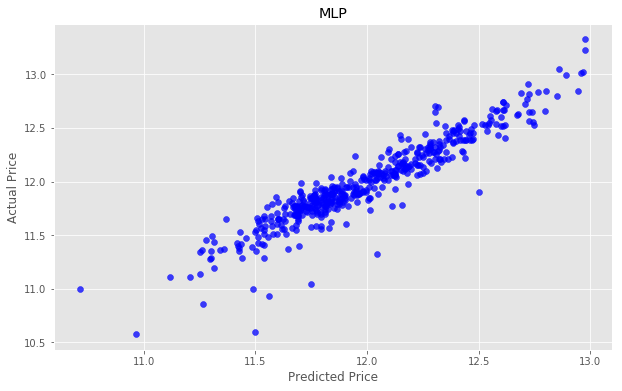

In [23]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('MLP')
plt.show()

### MLP with PCA:

In [24]:
mlp_regressor = MLPRegressor(solver='lbfgs',hidden_layer_sizes = (200,5,5),alpha = 1.0, activation = 'relu', max_iter = 100)
mlp_regressor.fit(X_train1,y_train1)

#Score model
cross_valid_scores = cross_val_score(mlp_regressor, X_test1, y_test1,cv=5, n_jobs=1)

print ("Test score is: \n", mlp_regressor.score(X_test1, y_test1)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(mlp_regressor, X_test, y_test, cv=5 )

Test score is: 
 0.796901347047
Cross validation test scores are: 
 [ 0.71365921  0.831223    0.65222956 -6.99599339  0.50338193]
Cross validation test scores mean is: 
 -0.859099941803


In [25]:
predictions7 = mlp_regressor.predict(X_test1)
print("Mean Squared Error : " + str(mean_squared_error(y_test1,predictions7)))

Mean Squared Error : 0.0313854348355


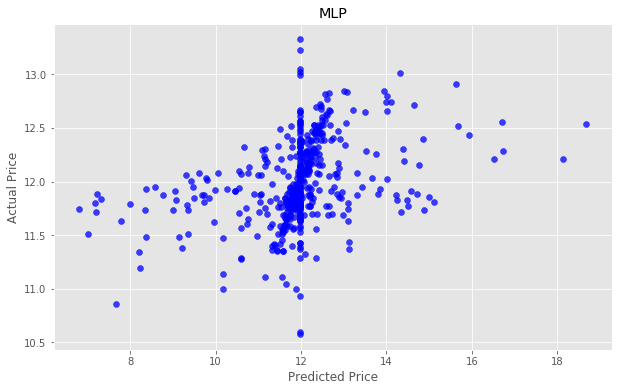

In [26]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('MLP')
plt.show()

### SVM:

In [27]:
from sklearn.svm import SVR

# SVM
svr_model = SVR(kernel='rbf', C=2, epsilon=0.05)
svr_model.fit(X, y)

# Score model
cross_valid_scores = cross_val_score(svr_model, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", svr_model.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(svr_model, X_test, y_test, cv=5 )

Test score is: 
 0.986044145018
Cross validation test scores are: 
 [ 0.29159063  0.2800178   0.19889673  0.31789074  0.29590738]
Cross validation test scores mean is: 
 0.276860655368


In [28]:
predictions_8 = svr_model.predict(X_test)
print("Mean Squared Error : " + str(mean_squared_error(y_test,predictions_8)))

Mean Squared Error : 0.0021566394988


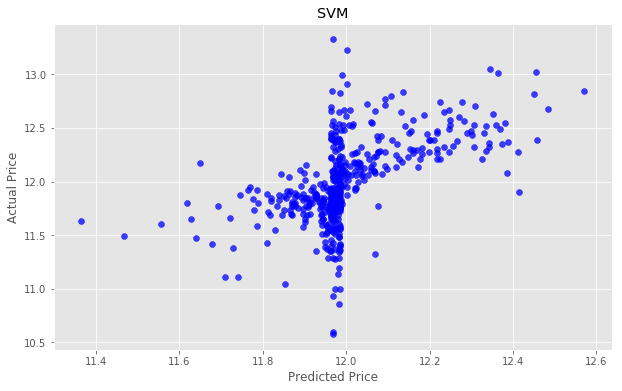

In [29]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('SVM')
plt.show()

### Basic Decision tree:

In [30]:
# Define model
basic_decision_tree = DecisionTreeRegressor()

# Fit model
basic_decision_tree.fit(X, y)

# Score model
cross_valid_scores = cross_val_score(basic_decision_tree, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", basic_decision_tree.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(basic_decision_tree, X_test, y_test, cv=5 )

Test score is: 
 0.999999996944
Cross validation test scores are: 
 [ 0.70646936  0.72017989  0.70936028  0.57441508  0.62787409]
Cross validation test scores mean is: 
 0.667659739407


In [31]:
predictions_5 = basic_decision_tree.predict(X_test)
print("Mean Squared Error : " + str(mean_squared_error(y_test,predictions_5)))

Mean Squared Error : 4.72276373045e-10


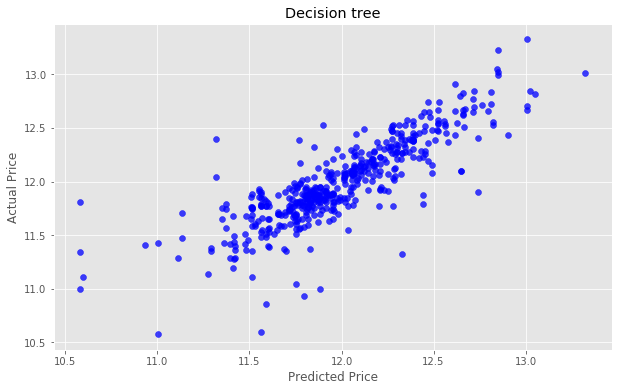

In [32]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Decision tree')
plt.show()

### XGBoost

In [33]:
learning_rates = np.arange(0.0, 0.09, 0.0015)
learning_rates
best_learning_rates = [0.0885, 0.0735, 0.0705, 0.0615, 0.06, 0.0585, 0.057, 0.0555]

In [34]:
# XGBoost
from xgboost import XGBRegressor


XGBoost = XGBRegressor(n_estimators = 1000,learning_rate=0.0585)
XGBoost.fit(X_train, y_train)

# Score model
cross_valid_scores = cross_val_score(XGBoost, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", XGBoost.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(XGBoost, X_test, y_test, cv=5 )

Test score is: 
 0.904333573085
Cross validation test scores are: 
 [ 0.87026815  0.89698366  0.84196832  0.88867976  0.81518447]
Cross validation test scores mean is: 
 0.862616871264


In [35]:
prediction = XGBoost.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,prediction)))

Mean squared Error : 0.0147836155691


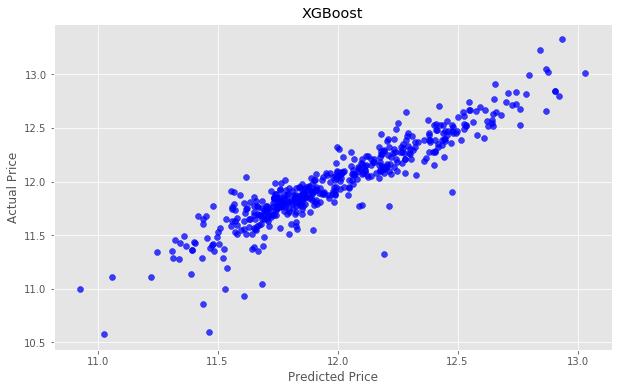

In [36]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost')
plt.show()

### Lasso regression:

In [37]:
# Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train, y_train)
# Score model
cross_valid_scores = cross_val_score(lasso, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", lasso.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(lasso, X_test, y_test, cv=5 )

Test score is: 
 0.910054829989
Cross validation test scores are: 
 [ 0.90894524  0.90800054  0.88153855  0.91038455  0.84606603]
Cross validation test scores mean is: 
 0.890986983248


In [38]:
predictions_lasso = lasso.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_lasso)))

Mean squared Error : 0.0138994928381


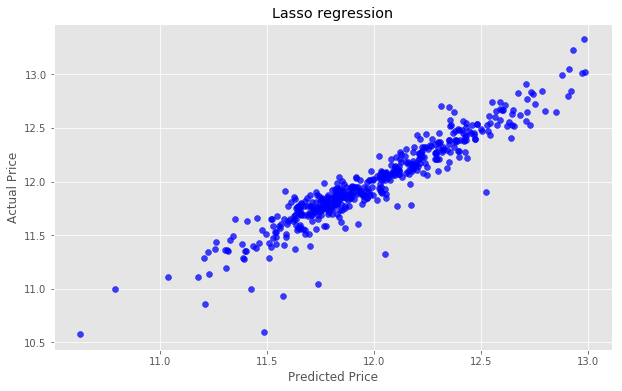

In [39]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso regression')
plt.show()

### Elastic Net Regression:

In [40]:
# Elastic Net regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train, y_train)
# Score model
cross_valid_scores = cross_val_score(ENet, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", ENet.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(ENet, X_test, y_test, cv=5 )

Test score is: 
 0.910029351699
Cross validation test scores are: 
 [ 0.90817287  0.90671866  0.88042411  0.91041826  0.84490656]
Cross validation test scores mean is: 
 0.890128090157


In [41]:
predictions_ENet = ENet.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_ENet)))

Mean squared Error : 0.0139034300735


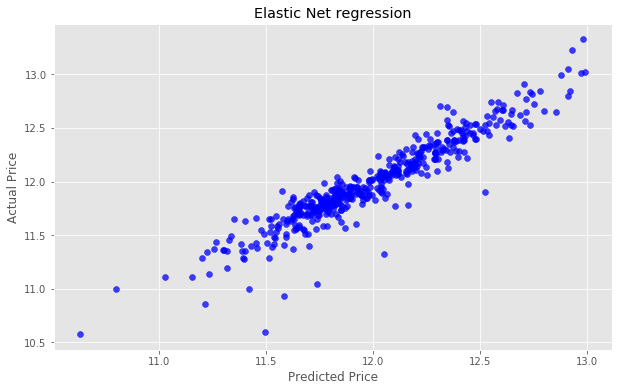

In [42]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Elastic Net regression')
plt.show()

### Gradient Boosting Regression:

In [43]:
# Gradient boosting regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(X_train, y_train)
# Score model
cross_valid_scores = cross_val_score(GBoost, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", GBoost.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(GBoost, X_test, y_test, cv=5 )

Test score is: 
 0.90059787427
Cross validation test scores are: 
 [ 0.87818367  0.87965382  0.86103002  0.90096045  0.79996106]
Cross validation test scores mean is: 
 0.863957802646


In [44]:
predictions_GBoost = GBoost.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_GBoost)))

Mean squared Error : 0.015360904143


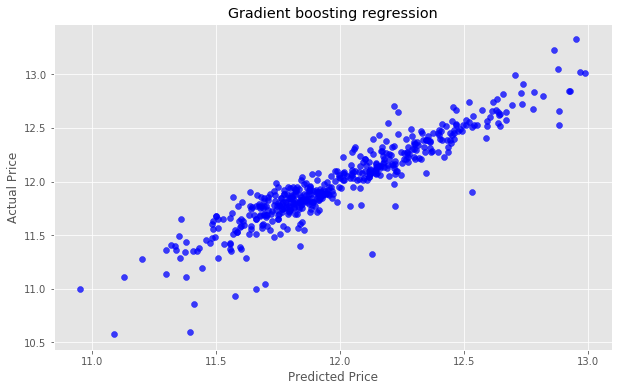

In [45]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Gradient boosting regression')
plt.show()

### Light GBM:

In [46]:
# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train, y_train.ravel())
# Score model
cross_valid_scores = cross_val_score(model_lgb, X_test, y_test.ravel(),cv=5, n_jobs=1)

print ("Test score is: \n", model_lgb.score(X_test, y_test.ravel())) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(model_lgb, X_test, y_test, cv=5 )

Test score is: 
 0.900108707523
Cross validation test scores are: 
 [ 0.86479062  0.89212898  0.85439393  0.8801254   0.79452261]
Cross validation test scores mean is: 
 0.857192309692


In [47]:
predictions_model_lgb = model_lgb.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_model_lgb)))

Mean squared Error : 0.0154364965256


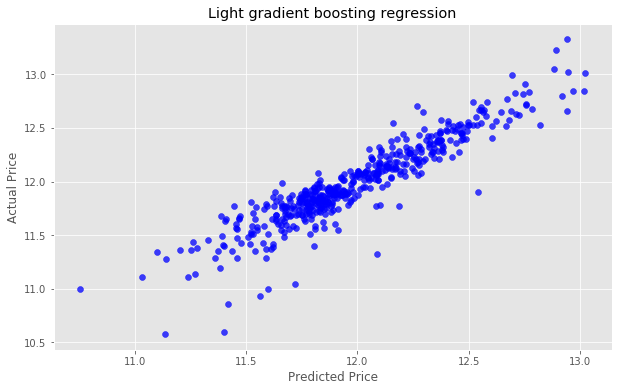

In [48]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Light gradient boosting regression')
plt.show()

### AdaBoost:

In [49]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost = AdaBoostRegressor(n_estimators=100)
ada_boost.fit(X_train, y_train)
# Score model
cross_valid_scores = cross_val_score(ada_boost, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", ada_boost.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(ada_boost, X_test, y_test, cv=5 )

Test score is: 
 0.840810183728
Cross validation test scores are: 
 [ 0.79627081  0.84714853  0.77253132  0.78656501  0.67736375]
Cross validation test scores mean is: 
 0.775975883741


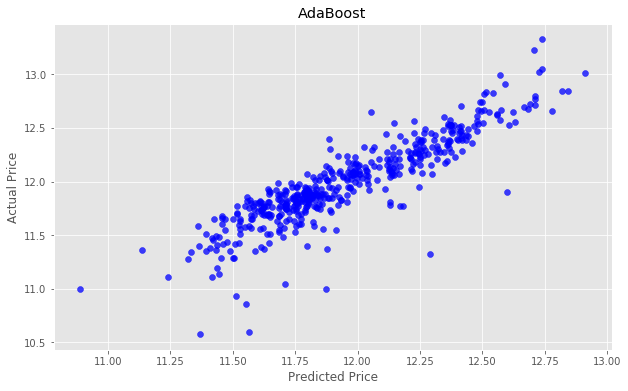

In [50]:
actual_values = y_test
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('AdaBoost')
plt.show()

### Avereging Models:

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

### Enet regression + GBoost + LGBM + Lasso regression (Best Score):

In [52]:
# Averging Models

averaged_models = AveragingModels(models = (ENet, GBoost, model_lgb, lasso))

averaged_models.fit(X_train, y_train)

cross_valid_scores = cross_val_score(averaged_models, X_test, y_test,cv=5, n_jobs=1)


print ("Test Score: \n", averaged_models.score(X_test, y_test))
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean())

Test Score: 
 0.912363451983
Cross validation test scores are: 
 [ 0.90054565  0.90907207  0.87977617  0.92037988  0.83842881]
Cross validation test scores mean is: 
 0.889640517783


### Ridge LR + RandomForest + XGBoost + GBoost:

In [53]:

averaged_models_1 = AveragingModels(models = (linm, model_random_forest, XGBoost, GBoost))

averaged_models_1.fit(X_train, y_train)

cross_valid_scores = cross_val_score(averaged_models_1, X_test, y_test,cv=5, n_jobs=1)

print ("Test Score: \n", averaged_models_1.score(X_test, y_test))
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean())

Test Score: 
 0.908039215605
Cross validation test scores are: 
 [ 0.88712179  0.91080491  0.86334082  0.92192826  0.81608884]
Cross validation test scores mean is: 
 0.87985692422


In [54]:
predictions = averaged_models_1.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test.ravel(),predictions)))

Mean squared Error : 0.0142109716834


### ENet + Lasso + XGboost + GBoost

In [55]:

averaged_models_2 = AveragingModels(models = (linm, XGBoost, ENet, lasso))

averaged_models_2.fit(X_train, y_train)

cross_valid_scores = cross_val_score(averaged_models_2, X_test, y_test,cv=5, n_jobs=1)

print ("Test Score: \n", averaged_models_2.score(X_test, y_test))
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean())

Test Score: 
 0.912850738107
Cross validation test scores are: 
 [ 0.90549454  0.91478199  0.87982614  0.9234698   0.84491723]
Cross validation test scores mean is: 
 0.893697940159


In [56]:
predictions = averaged_models_2.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test.ravel(),predictions)))

Mean squared Error : 0.0134674328969


### Bagging: Using Three models

In [57]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(XGBRegressor(n_estimators = 1000,learning_rate=0.0585),max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)

cross_valid_scores = cross_val_score(bagging, X_test, y_test,cv=5, n_jobs=1)

print ("Test Score: \n", bagging.score(X_test, y_test))
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean())

Test Score: 
 0.892008477587
Cross validation test scores are: 
 [ 0.86466464  0.88642716  0.83625614  0.91201909  0.79426119]
Cross validation test scores mean is: 
 0.85872564537


In [58]:
predictions_b = bagging.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_b)))

Mean squared Error : 0.0166882489874


In [59]:
from sklearn.ensemble import BaggingRegressor

bagging_1 = BaggingRegressor(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5),max_samples=0.5, max_features=0.5)
bagging_1.fit(X_train, y_train)

cross_valid_scores = cross_val_score(bagging_1, X_test, y_test,cv=5, n_jobs=1)

print ("Test Score: \n", bagging_1.score(X_test, y_test))
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean())

Test Score: 
 0.897198439326
Cross validation test scores are: 
 [ 0.85250563  0.86459569  0.81925944  0.88212768  0.77438963]
Cross validation test scores mean is: 
 0.838575612428


In [60]:
predictions_b1 = bagging.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_b1)))

Mean squared Error : 0.0166882489874


In [61]:
from sklearn.ensemble import BaggingRegressor

bagging_2 = BaggingRegressor(lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11),max_samples=0.5, max_features=0.5)
bagging_2.fit(X_train, y_train)

cross_valid_scores = cross_val_score(bagging_2, X_test, y_test,cv=5, n_jobs=1)

print ("Test Score: \n", bagging_2.score(X_test, y_test))
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean())

Test Score: 
 0.891194566766
Cross validation test scores are: 
 [ 0.85339501  0.88518604  0.82586392  0.90222829  0.80391294]
Cross validation test scores mean is: 
 0.854117239505


In [62]:
predictions_b2 = bagging.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_b2)))

Mean squared Error : 0.0166882489874


In [63]:
from sklearn.ensemble import BaggingRegressor

bagging_2 = BaggingRegressor(AdaBoostRegressor(n_estimators=100))
bagging_2.fit(X_train, y_train)

cross_valid_scores = cross_val_score(bagging_2, X_test, y_test,cv=5, n_jobs=1)

print ("Test Score: \n", bagging_2.score(X_test, y_test))
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean())

Test Score: 
 0.853161230232
Cross validation test scores are: 
 [ 0.80656599  0.87957948  0.7896981   0.85364857  0.72060181]
Cross validation test scores mean is: 
 0.810018790692


In [64]:
predictions_b2 = bagging.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_b2)))

Mean squared Error : 0.0166882489874


### Averging bagging models:

In [65]:
#Best version
averaged_models_3 = AveragingModels(models = (bagging, bagging_1, bagging_2, linm))

averaged_models_3.fit(X_train, y_train)

cross_valid_scores = cross_val_score(averaged_models_3, X_test, y_test,cv=5, n_jobs=1)

print ("Test Score: \n", averaged_models.score(X_test, y_test))
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean())

Test Score: 
 0.912363451983
Cross validation test scores are: 
 [ 0.87181217  0.9047073   0.83976714  0.91674413  0.80140913]
Cross validation test scores mean is: 
 0.866887973826


In [66]:
predictions = averaged_models_3.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions)))

Mean squared Error : 0.0154520718287


### Making a submission

In [67]:
submission = pd.DataFrame()
%store -r test_ID
submission['Id'] = test_ID

In [68]:
feats = test_set.select_dtypes(
        include=[np.number]).interpolate()
feats.shape

(1459, 291)

In [69]:
predictions = averaged_models_2.predict(feats)
final_predictions = np.exp(predictions)
#final_predictions = predictions

In [70]:
submission['SalePrice'] = final_predictions
submission.head(10)

,Id,SalePrice
0,1461,118907.622726
1,1462,155799.412207
2,1463,190629.827216
3,1464,199874.931959
4,1465,192918.863727
5,1466,169140.871816
6,1467,171330.442720
7,1468,162951.676557
8,1469,190397.995824
9,1470,120865.033238


In [1]:
#submission.to_csv("name_submission.csv", index=False)